<a href="https://colab.research.google.com/github/YuvarajGML/YuvarajGML/blob/main/Eigen_Faces.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This mini-project demonstrates unsupervised face clustering on the Labeled Faces in the Wild (LFW) dataset using Principal Component Analysis (PCA) for dimensionality reduction, followed by t-SNE and UMAP for visualization.



In [15]:
from sklearn.datasets import fetch_lfw_people
people  = fetch_lfw_people(min_faces_per_person = 60)
from sklearn.decomposition import PCA
pca = PCA(n_components=150 , svd_solver='randomized' , random_state=0) # Singular Value Decompostion is set to randomized so that Computatation time is minimized
pca.fit(people.data)
print(people.images.shape)

(1348, 62, 47)


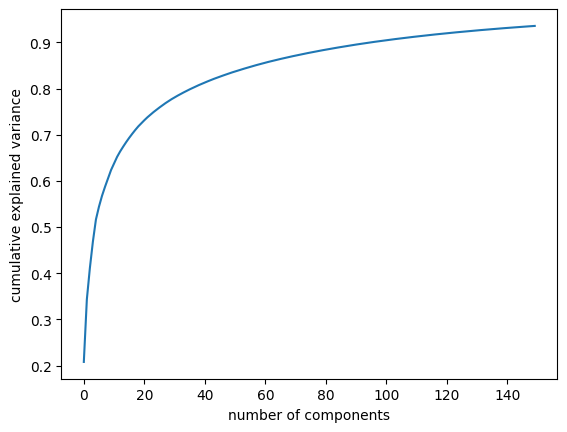

In [4]:
#Plotting Explained Variance ratio plot to find then number of components required to retain atleast 90% of the data
import matplotlib.pyplot as plt
import numpy as np
plt.plot(np.cumsum(pca.explained_variance_ratio_)) # cumulative sum of the variance contained by the components of faces
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()


We can see that the range of 120-150 components almost account for  90% of the variance contained in the images ( people.images)



**Color of the plotted points indicates faces of different people.**

 **Clusters Formed**:

 Faces of the same person tend to be close together, forming small clusters.
 If the clusters are well-defined, it means t-SNE successfully grouped similar faces.

 **Cluster Overlapping**:

Some clusters may overlap or blend, which means certain faces share similar visual features (e.g., lighting, pose).
If clusters are too mixed, it could indicate that t-SNE couldn't fully separate identities, possibly due to insufficient data or too many shared facial features.

 **Spread of Clusters**:

Tightly packed clusters → Faces of the same person are highly distinguishable.
Spread-out clusters → Some identities have more variation in expressions, poses, or lighting.


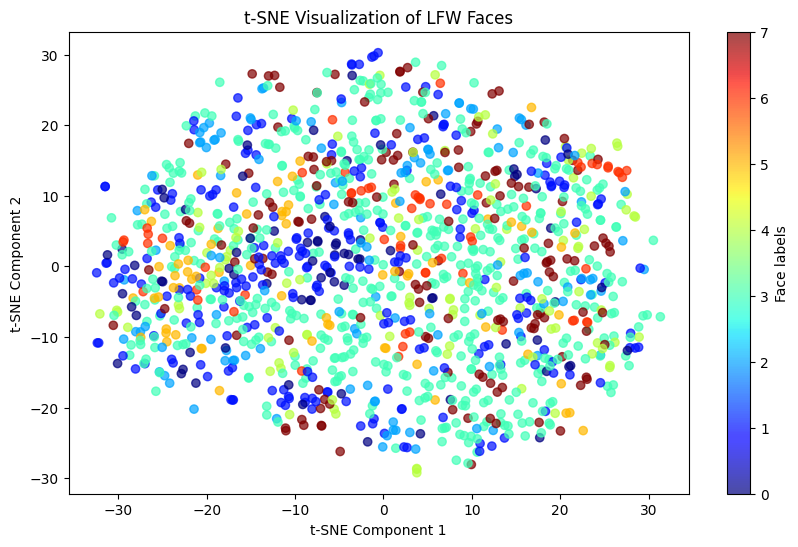

In [16]:
#plotting a t-Sne plot to visualize image in further reduced dimension (2D)
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2 , perplexity=40 , random_state=0)# The perplexity hyperparameter is used to describe how the TSNE will handle and show local and global clusters.
# Apply PCA transformation to the original data
X_pca_transformed = pca.transform(people.data)
# Pass the transformed data to t-SNE
trans = tsne.fit_transform(X_pca_transformed)
plt.figure(figsize=(10,6))
# Assuming 'y' contains the target labels, make sure it's defined
scatter = plt.scatter(trans[:,0] , trans[:,1]  ,c=people.target, cmap='jet' , alpha=0.7) # Use people.target for labels
plt.colorbar(scatter , label='Face labels')
plt.title("t-SNE Visualization of LFW Faces")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.show()

Text(0, 0.5, '150-dim\nreconstruction')

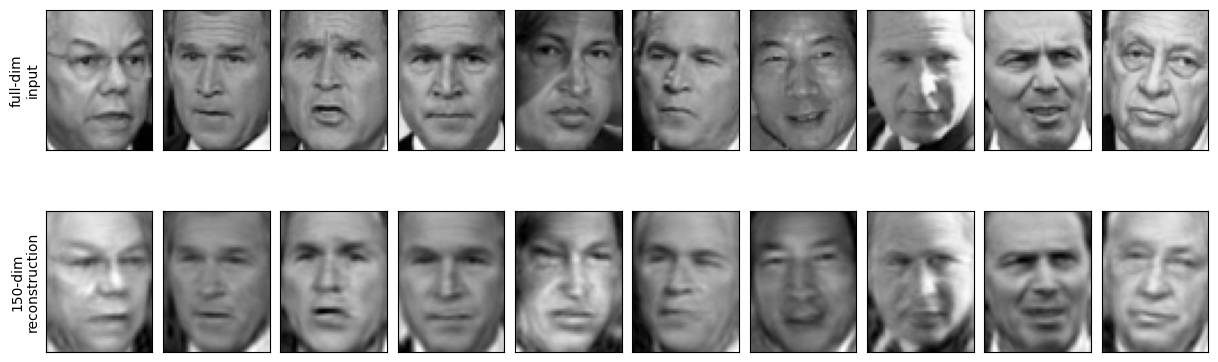

In [10]:
#Plottin reconstructed faces by only considering primary eigen values and reduced components which retain majority of the data
components = pca.transform(people.data)
projected = pca.inverse_transform(components)
fig , ax = plt.subplots(2,10 ,figsize=(15,5) , subplot_kw={'xticks':[],'yticks':[]} , gridspec_kw=dict(hspace=0.1 , wspace=0.1))
for i in range(10):
  ax[0,i].imshow(people.data[i].reshape(62,47) ,cmap = 'binary_r')
  ax[1,i].imshow(projected[i].reshape(62,47) , cmap = 'binary_r')
ax[0,0].set_ylabel('full-dim\ninput')
ax[1,0].set_ylabel('150-dim\nreconstruction')
